In [33]:
from prophet import Prophet
import pandas as pd
from matplotlib import pyplot as plt
from prophet.diagnostics import cross_validation, performance_metrics

In [20]:
data = pd.read_csv('./UsageByDayClean.csv',usecols=['TIME','BIKE USAGE'])
data['TIME'] = pd.to_datetime(data['TIME'])
data.rename(columns={'TIME':'ds','BIKE USAGE':'y'},inplace=True)

pre_covid_date = pd.to_datetime('2020-02-29')
post_covid_date = pd.to_datetime('2022-01-21')
# remove all data after 2020-03-27
data_pre_covid = data[data['ds'] < pre_covid_date]
data_in_covid = data[data['ds'] >= pre_covid_date]

23:43:08 - cmdstanpy - INFO - Chain [1] start processing
23:43:08 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\User\Documents\Year 4\MLFinalAssignment\venv\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\User\Documents\Year 4\MLFinalAssignment\venv\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


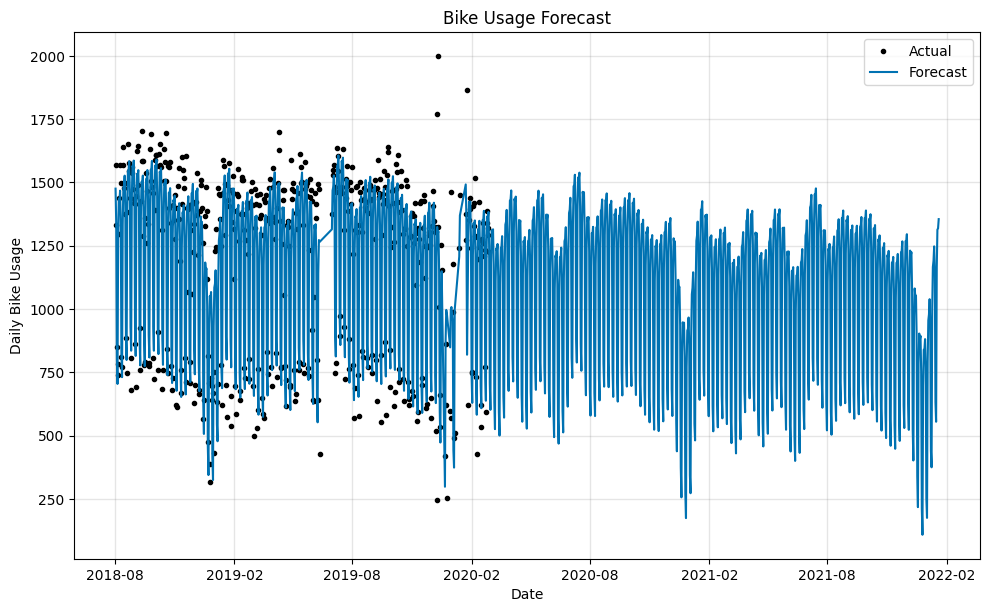

In [27]:
length_of_covid = (post_covid_date - pre_covid_date).days
model = Prophet(yearly_seasonality=True,weekly_seasonality=True,daily_seasonality=False)

model.fit(data_pre_covid)
future = model.make_future_dataframe(periods=length_of_covid)
forecast = model.predict(future)
fig = model.plot(forecast,uncertainty=False)
# label the plot
plt.title('Bike Usage Forecast')
plt.xlabel('Date')
plt.ylabel('Daily Bike Usage')
plt.legend(['Actual','Forecast'])
plt.show()

c:\Users\User\Documents\Year 4\MLFinalAssignment\venv\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\User\Documents\Year 4\MLFinalAssignment\venv\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\User\Documents\Year 4\MLFinalAssignment\venv\lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series contain

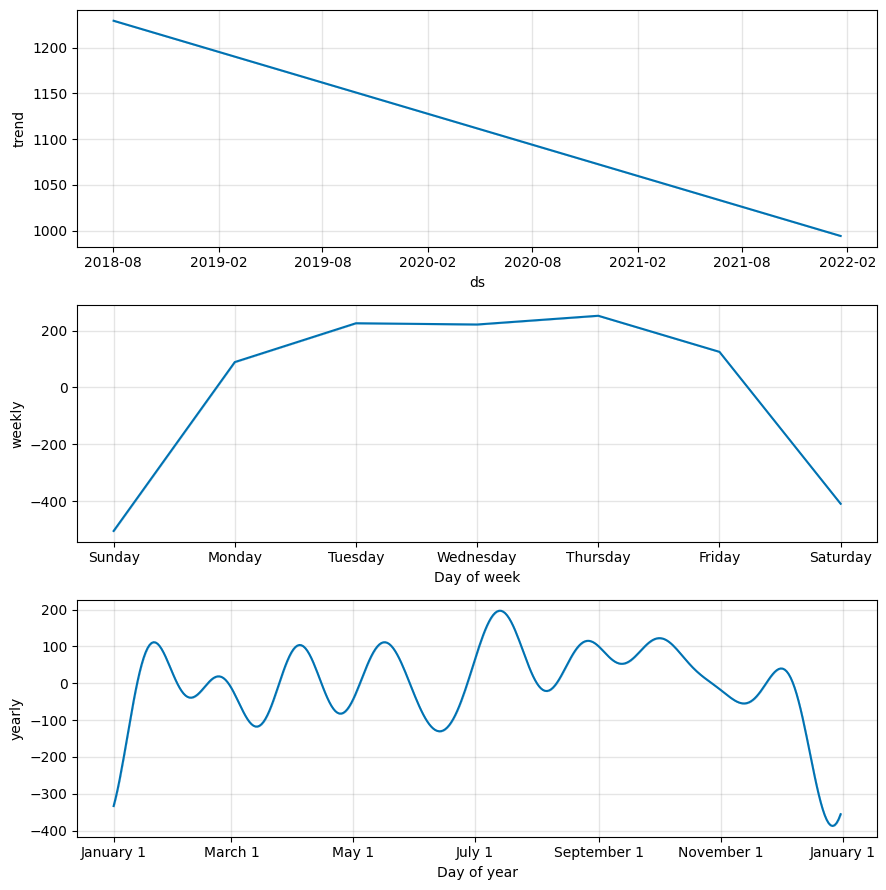

In [24]:
# plot the components of the model
fig = model.plot_components(forecast)
plt.show()

In [25]:
total_median = data['y'].median()
pre_covid_median= data_pre_covid['y'].median()
during_covid_median= data_in_covid['y'].median()
total_forecast_median= forecast['yhat'].median()
forecast_in_covid_median = forecast[forecast['ds'] >= pre_covid_date]['yhat'].median()
pre_covid_forecast_median = forecast[forecast['ds'] < pre_covid_date]['yhat'].median()
print('total_median: ',total_median)
print('pre_covid_median: ',pre_covid_median)
print('during_covid_median: ',during_covid_median)
print('total forecast_median: ',total_forecast_median.__round__(2))
print('forecast_in_covid_median: ',forecast_in_covid_median.__round__(2))
print('Pre covid forecast median: ',pre_covid_forecast_median.__round__(2))

total_median:  766.0
pre_covid_median:  1336.5
during_covid_median:  675.0
total forecast_median:  1236.84
forecast_in_covid_median:  1190.54
Pre covid forecast median:  1321.47


In [43]:
# evaluating the accuracy of the model
cv_params = {'initial': '90 days','period': '30 days','horizon': '30 days'}
df_cv = cross_validation(model,horizon='30 days',period='30 days',initial='365 days')
df_p = performance_metrics(df_cv)

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/7 [00:00<?, ?it/s]01:34:50 - cmdstanpy - INFO - Chain [1] start processing
01:34:50 - cmdstanpy - INFO - Chain [1] done processing
 14%|█▍        | 1/7 [00:00<00:01,  5.03it/s]01:34:50 - cmdstanpy - INFO - Chain [1] start processing
01:34:50 - cmdstanpy - INFO - Chain [1] done processing
 29%|██▊       | 2/7 [00:00<00:01,  4.88it/s]01:34:50 - cmdstanpy - INFO - Chain [1] start processing
01:34:50 - cmdstanpy - INFO - Chain [1] done processing
 43%|████▎     | 3/7 [00:00<00:00,  4.68it/s]01:34:51 - cmdstanpy - INFO - Chain [1] start processing
01:34:51 - cmdstanpy - INFO - Chain [1] done processing
 57%|█████▋    | 4/7 [00:00<00:00,  4.78it/s]01:34:51 - cmdstanpy - INFO - Chain [1] start processing
01:34:51 - cmdstanpy - INFO - Chain [1] done processing
 71%|███████▏  | 5/7 [00:01<00:00,  4.75it/s]01:34:51 - cmdstanpy - INFO - Chain [1] start processing
01:34:51 - c

In [44]:
df_p.iloc[20:]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
20,23 days,10581.561144,102.866715,82.467528,0.088335,0.057887,0.086406,0.944444
21,24 days,14254.091412,119.390500,80.291992,0.092752,0.050373,0.085392,0.944444
22,25 days,45351.703918,212.959395,111.983958,0.247417,0.049585,0.135695,0.888889
23,26 days,111476.845703,333.881485,170.239167,0.270859,0.055253,0.175595,0.849206
24,27 days,131648.381564,362.833821,199.976719,0.317738,0.068167,0.205704,0.833333
25,28 days,128112.602251,357.928208,207.827711,0.235238,0.079738,0.191065,0.825397
26,29 days,66902.659231,258.655484,151.234671,0.183021,0.067874,0.141570,0.879630
27,30 days,31576.309555,177.697241,110.855557,0.131502,0.065732,0.106959,0.898148


In [45]:
df_p.to_csv('./performance no covid.csv',index=False)